<a href="https://colab.research.google.com/github/BKV15/AI_Utech/blob/main/Deep%20Learning/Exercise_2/E2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2 - 2 : Fashion MNISt dataset classification

## ` Importing Libraries`

In [45]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , Conv2D , MaxPool2D , Flatten
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.metrics import confusion_matrix

# Fully Connected Nework

## `Loading the dataset`

In [24]:
(X_train_raw , y_train_raw) , (X_test_raw , y_test_raw) = fashion_mnist.load_data()

## `Number of target classes and Their labels`
[Labels source]('https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/)

In [12]:
labels_mapping = {0: 'T-shirt/top',
                  1: 'Trouser',
                  2: 'Pullover',
                  3: 'Dress',
                  4: 'Coat',
                  5: 'Sandal',
                  6: 'Shirt',
                  7: 'Sneaker',
                  8: 'Bag',
                  9: 'Ankle boo'}

In [25]:
for index in np.unique(y_train_raw):
    print(f'Class : {index} , Label : {labels_mapping[index]}')

Class : 0 , Label : T-shirt/top
Class : 1 , Label : Trouser
Class : 2 , Label : Pullover
Class : 3 , Label : Dress
Class : 4 , Label : Coat
Class : 5 , Label : Sandal
Class : 6 , Label : Shirt
Class : 7 , Label : Sneaker
Class : 8 , Label : Bag
Class : 9 , Label : Ankle boo


## `Number pictures and their labels`

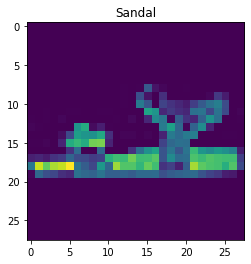

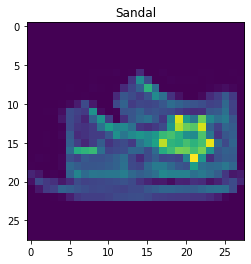

In [44]:
# Sample range for train : 0-59999 and for test : 0-9999
sample_train = 59999
sample_test = 9999

plt.figure(1)
plt.imshow(X_train_raw[sample_train])
plt.title(labels_mapping[y_train_raw[sample_train]])
plt.show()

plt.figure(2)
plt.imshow(X_test_raw[sample_test])
plt.title(labels_mapping[y_test_raw[sample_test]])
plt.show()

## ` Preprocessing dataset for training`
* `step 1 :` Flattening images
* `step 2 :` Normalizing image values
* `step 3 :` OneHotEncoding labels

In [30]:
X_train = np.array([img.reshape(784) for img in X_train_raw])
X_test = np.array([img.reshape(784) for img in X_test_raw])

X_train = X_train / 255
X_test = X_test / 255

print('Original Shape :')
print(f'Train shape : {X_train_raw.shape} , Test shape : {X_test_raw.shape}')
print('Flatten shape :')
print(f'Train shape : {X_train.shape} , Test shape : {X_test.shape}')

Original Shape :
Train shape : (60000, 28, 28) , Test shape : (10000, 28, 28)
Flatten shape :
Train shape : (60000, 784) , Test shape : (10000, 784)


In [32]:
y_train = keras.utils.to_categorical(y_train_raw , num_classes=10)
y_test = keras.utils.to_categorical(y_test_raw , num_classes=10)

print('Original Shape :')
print(f'Train shape : {y_train_raw.shape} , Test shape : {y_test_raw.shape}')
print('Encoded shape :')
print(f'Train shape : {y_train.shape} , Test shape : {y_test.shape}')

Original Shape :
Train shape : (60000,) , Test shape : (10000,)
Encoded shape :
Train shape : (60000, 10) , Test shape : (10000, 10)


## ` Building and training model`

In [34]:
model = Sequential()
model.add(Dense(128 , activation='relu' , input_dim=784))
model.add(Dense(256 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10 , activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model.fit(X_train , y_train , batch_size=100 , epochs=100 , validation_split=0.2)

## ` Evaluating model`

In [41]:
loss , acc = model.evaluate(X_test , y_test)

print(f'Test Accuracy : {acc:.2f} , Test Loss : {loss:.2f}')

313/313 [==============================] - 1s 4ms/step - loss: 2.4399 - accuracy: 0.8648
Test Accuracy : 0.86 , Test Loss : 2.44


In [43]:
predicted_proba = model.predict(X_test)
y_pred = np.argmax(predicted_proba , axis=1)
confusion_matrix(y_test_raw , y_pred)

array([[825,   2,  22,  34,   5,   1, 105,   1,   5,   0],
       [  2, 975,   2,  15,   5,   0,   0,   0,   1,   0],
       [ 15,   2, 739,   9, 204,   1,  28,   0,   2,   0],
       [ 28,   7,  13, 856,  68,   1,  26,   0,   1,   0],
       [  1,   0,  58,  16, 904,   0,  16,   0,   5,   0],
       [  1,   0,   0,   0,   0, 953,   1,  27,   3,  15],
       [141,   1, 124,  25, 187,   0, 505,   0,  17,   0],
       [  0,   0,   0,   0,   0,  12,   0, 971,   2,  15],
       [  3,   2,   5,   4,   6,   2,   2,   4, 972,   0],
       [  0,   0,   0,   0,   0,   8,   1,  43,   0, 948]])

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

print(f'Last training accuracy : {acc[-1]} , Last validation accuracy : {val_acc[-1]}')
print(f'Max training accuracy : {max(acc)} , Max validation accuracy : {max(val_acc)}')

print(f'Last training loss : {loss[-1]} , Last validation loss : {val_loss[-1]}')
print(f'Min training loss : {min(loss)} , Min validation loss : {min(val_loss)}')

Last training accuracy : 0.9352916479110718 , Last validation accuracy : 0.8706666827201843
Max training accuracy : 0.9354583621025085 , Max validation accuracy : 0.8884999752044678
Last training loss : 0.23389174044132233 , Last validation loss : 1.880027174949646
Min training loss : 0.21251997351646423 , Min validation loss : 0.5216587781906128


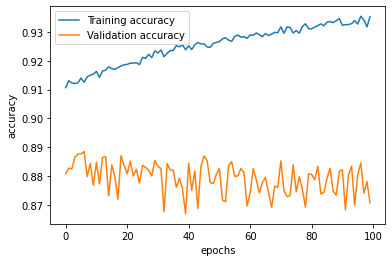

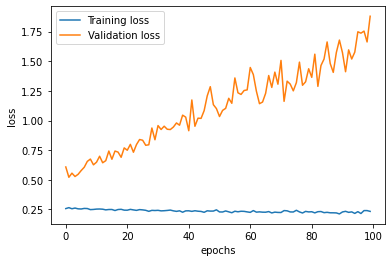

In [40]:
plt.figure(1)
plt.plot(acc , label='Training accuracy')
plt.plot(val_acc , label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(loss , label='Training loss')
plt.plot(val_loss , label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Convultional Neural Network

## `Preprocessing data`

In [62]:
X_train_raw = X_train_raw / 255.
X_test_raw = X_test_raw / 255.

## `Building and Training model`

In [66]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64 , (3,3) , activation='relu' , input_shape=(28,28,1)))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Conv2D(128 , (3,3) , activation='relu'))
model_cnn.add(MaxPool2D((2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128 , activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10 , activation='softmax'))

model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [74]:
model_cnn.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model_cnn.fit(X_train_raw , y_train , batch_size=100 , epochs=100 , validation_split=0.2)

## `Evaluating model`

In [76]:
loss , acc = model_cnn.evaluate(X_test_raw , y_test)

print(f'Test Accuracy : {acc:.2f} , Test Loss : {loss:.2f}')

313/313 [==============================] - 2s 6ms/step - loss: 0.4280 - accuracy: 0.8783
Test Accuracy : 0.88 , Test Loss : 0.43


In [77]:
predicted_proba = model_cnn.predict(X_test_raw)
y_pred = np.argmax(predicted_proba , axis=1)
confusion_matrix(y_test_raw , y_pred)

array([[896,   2,  17,  31,   1,   1,  44,   0,   8,   0],
       [  6, 964,   0,  22,   4,   0,   2,   0,   2,   0],
       [ 20,   1, 828,   9,  95,   0,  47,   0,   0,   0],
       [ 23,   2,  13, 910,  31,   0,  21,   0,   0,   0],
       [  1,   0,  64,  31, 875,   1,  27,   0,   1,   0],
       [  0,   0,   0,   0,   0, 976,   0,  20,   0,   4],
       [223,   0,  99,  37, 148,   0, 483,   0,  10,   0],
       [  0,   0,   0,   0,   0,  11,   0, 981,   0,   8],
       [  4,   1,   5,   5,   3,   2,  11,   4, 964,   1],
       [  0,   0,   0,   0,   0,  11,   0,  83,   0, 906]])

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

print(f'Last training accuracy : {acc[-1]} , Last validation accuracy : {val_acc[-1]}')
print(f'Max training accuracy : {max(acc)} , Max validation accuracy : {max(val_acc)}')

print(f'Last training loss : {loss[-1]} , Last validation loss : {val_loss[-1]}')
print(f'Min training loss : {min(loss)} , Min validation loss : {min(val_loss)}')

Last training accuracy : 0.8777916431427002 , Last validation accuracy : 0.8799166679382324
Max training accuracy : 0.932812511920929 , Max validation accuracy : 0.9173333048820496
Last training loss : 0.37261784076690674 , Last validation loss : 0.38040754199028015
Min training loss : 0.1873369812965393 , Min validation loss : 0.24779421091079712


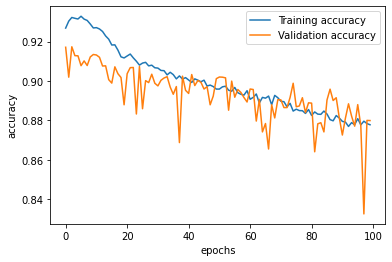

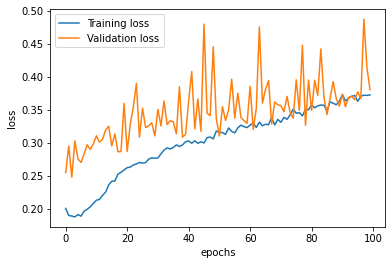

In [79]:
plt.figure(1)
plt.plot(acc , label='Training accuracy')
plt.plot(val_acc , label='Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(loss , label='Training loss')
plt.plot(val_loss , label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()